**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

### Columnas relevantes
Creemos que las columnas relevantes a utilizar son: 
* profile_years_experience
* salary_monthly_NETO
* tools_programming_languages

### Filtrado de datos
#### Años de experiencia
Para ver los máximos valores 


In [3]:
##missing values

relevant_columns = ['profile_years_experience', 'salary_monthly_NETO', 'tools_programming_languages']

missing_values_count=df.isnull().sum()
missing_values_count[relevant_columns]

profile_years_experience         0
salary_monthly_NETO            212
tools_programming_languages      1
dtype: int64

Vamos a quitar todos los nulos que aparecen en el campo de salario

In [4]:
filtered_values = df[df['salary_monthly_NETO'].notnull()]

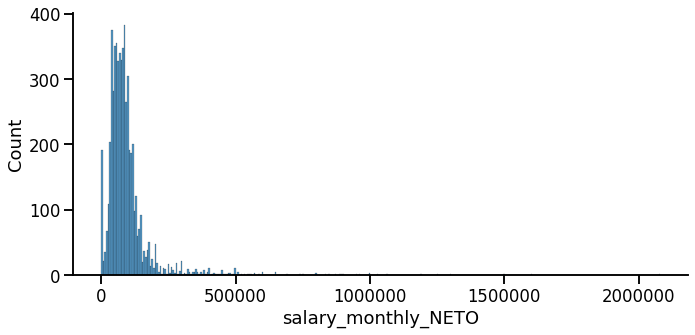

In [5]:
seaborn.displot(filtered_values['salary_monthly_NETO'], aspect=2)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

In [6]:
filtered_values['salary_monthly_NETO'].describe().round()

count       5883.0
mean       94908.0
std        96862.0
min            1.0
25%        51480.0
50%        78000.0
75%       106000.0
max      2080000.0
Name: salary_monthly_NETO, dtype: float64

In [7]:
filtered_values['salary_monthly_NETO'].median()

78000.0

In [8]:
filtered_values['salary_monthly_NETO'].min()

1.0

In [9]:
filtered_values['salary_monthly_NETO'].max()

2080000.0

Nuestra idea es filtrar para quedarnos con el 98% de los datos, quitando el 1% inicial y el 1% final

In [10]:
filtered_values['salary_monthly_NETO'].quantile([.01, .05, .10, .15, .20, .25, .80, .85, .90, .95, .99])

0.01        53.46
0.05     22500.00
0.10     35000.00
0.15     40000.00
0.20     45500.00
0.25     51480.00
0.80    115900.00
0.85    130000.00
0.90    150000.00
0.95    210000.00
0.99    491800.00
Name: salary_monthly_NETO, dtype: float64

Nos parece que podemos encontrar valores congruentes entre los percentiles de 0.05 y 0.95
Para ello vamos a graficar:

In [11]:
interesting_range = filtered_values['salary_monthly_NETO'].quantile([.05, .95])
min = interesting_range.values[0]
max = interesting_range.values[1]
filtered_values = filtered_values[filtered_values['salary_monthly_NETO'].between(min, max)]


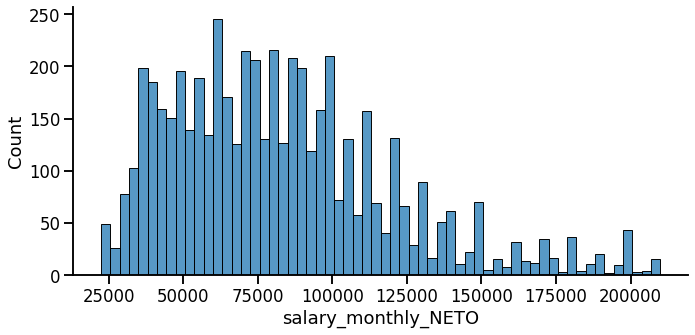

In [12]:
seaborn.displot(filtered_values['salary_monthly_NETO'], aspect=2, bins=60)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

Vamos a curar los datos de la columna lenguajes de programación

In [13]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
filtered_values.loc[:, 'cured_programming_languages'] = filtered_values.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
filtered_values = filtered_values.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_values[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
filtered_values[:5]

,programming_language,profile_years_experience,salary_monthly_NETO,tools_programming_languages,cured_programming_languages
0,ninguno,3.0,43000.0,Ninguno,[ninguno]
1,html,5.0,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
1,javascript,5.0,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
1,python,5.0,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
2,ninguno,2.0,127000.0,Ninguno,[ninguno]


Vamos a analizar el uso de los distintos lenguajes de programación

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

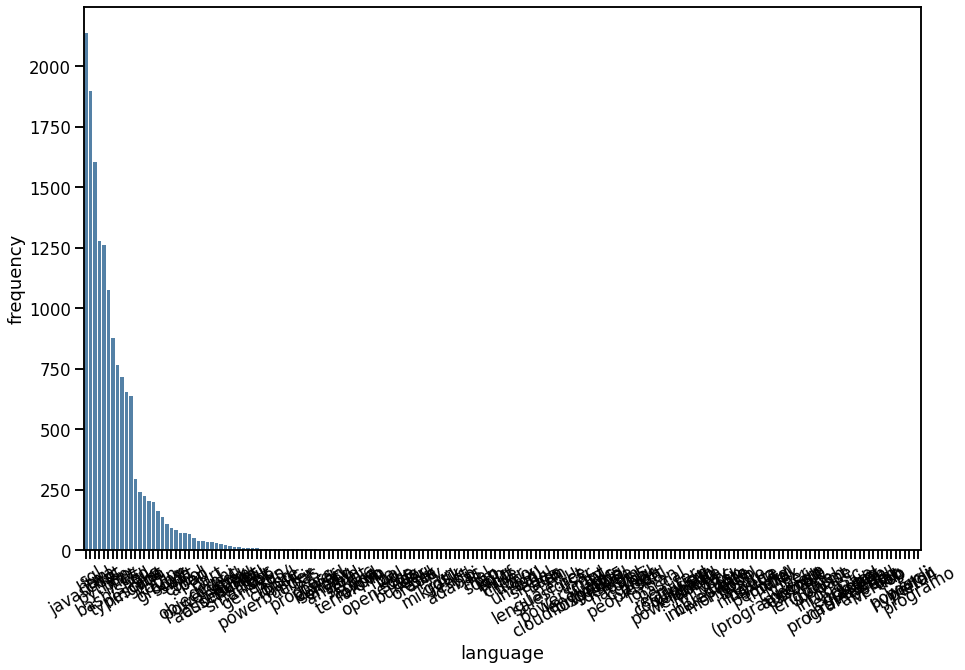

In [14]:
language_count = filtered_values.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
fig=plt.figure(figsize=(15,10))
seaborn.barplot(data=language_count, x='language', y='frequency', color="steelblue")
plt.xticks(rotation=30)

Vemos que podemos obtener información mucho más relevante si tomamos alrededor del 25% de los lenguajes de programación

In [15]:
max_index = int(len(language_count)/4)
filtered_languages = language_count[0:max_index]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'javascript'),
  Text(1, 0, 'sql'),
  Text(2, 0, 'html'),
  Text(3, 0, 'java'),
  Text(4, 0, 'python'),
  Text(5, 0, 'css'),
  Text(6, 0, 'bash/shell'),
  Text(7, 0, 'php'),
  Text(8, 0, '.net'),
  Text(9, 0, 'typescript'),
  Text(10, 0, 'c#'),
  Text(11, 0, 'ninguno'),
  Text(12, 0, 'go'),
  Text(13, 0, 'c++'),
  Text(14, 0, 'vba'),
  Text(15, 0, 'c'),
  Text(16, 0, 'kotlin'),
  Text(17, 0, 'groovy'),
  Text(18, 0, 'ruby'),
  Text(19, 0, 'scala'),
  Text(20, 0, 'swift'),
  Text(21, 0, 'r'),
  Text(22, 0, 'cobol'),
  Text(23, 0, 'abap'),
  Text(24, 0, 'perl'),
  Text(25, 0, 'objective-c'),
  Text(26, 0, 'powershell'),
  Text(27, 0, 'dart'),
  Text(28, 0, 'delphi'),
  Text(29, 0, 'actionscript'),
  Text(30, 0, 'assembler'),
  Text(31, 0, 'matlab'),
  Text(32, 0, 'apex

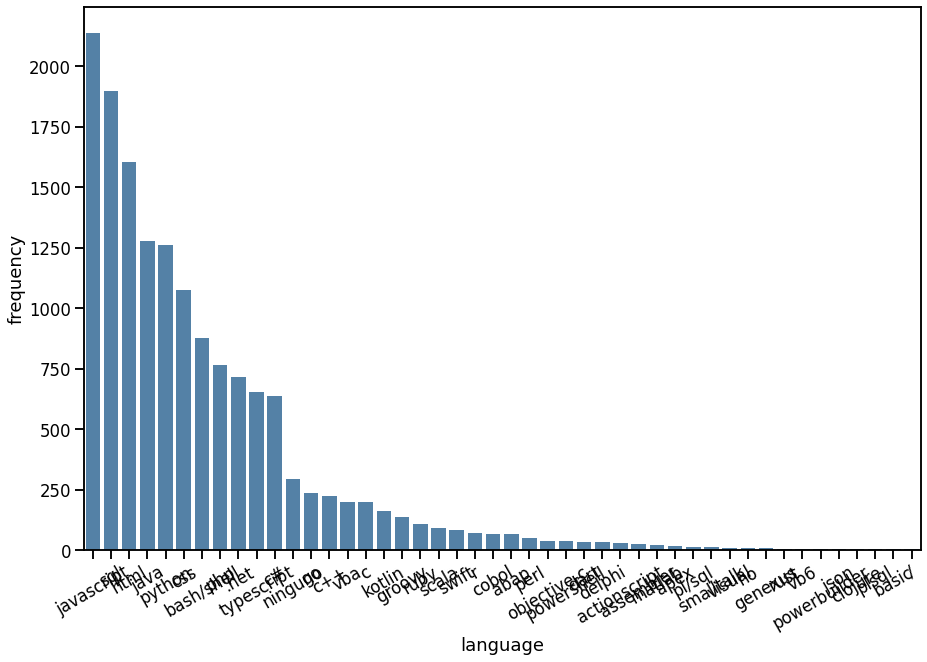

In [16]:
fig=plt.figure(figsize=(15,10))
seaborn.barplot(data=filtered_languages, x='language', y='frequency', color="steelblue")
plt.xticks(rotation=30)

De este conjunto sacaríamos de forma arbitraria algunos que no son lenguajes de programación y otros que son irrelevantes (tratamiento de base de datos, maquetado html)

In [17]:
languages_to_remove = ['ninguno', 'no', '/']
languages_to_remove += ['html', 'css', 'sql', 'powershell', 'power', 'pl/sql', 'de', "oracle", "oac", "bi", "hyperion"]
filtered_languages = filtered_languages[ ~filtered_languages['language'].isin(languages_to_remove) ]

In [21]:
filtered_languages[:100]

,language,frequency
0,javascript,2138
3,java,1278
4,python,1261
6,bash/shell,878
7,php,766
8,.net,717
9,typescript,655
10,c#,637
12,go,239
13,c++,223


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'javascript'),
  Text(1, 0, 'java'),
  Text(2, 0, 'python'),
  Text(3, 0, 'bash/shell'),
  Text(4, 0, 'php'),
  Text(5, 0, '.net'),
  Text(6, 0, 'typescript'),
  Text(7, 0, 'c#'),
  Text(8, 0, 'go'),
  Text(9, 0, 'c++'),
  Text(10, 0, 'vba'),
  Text(11, 0, 'c'),
  Text(12, 0, 'kotlin'),
  Text(13, 0, 'groovy'),
  Text(14, 0, 'ruby'),
  Text(15, 0, 'scala'),
  Text(16, 0, 'swift'),
  Text(17, 0, 'r'),
  Text(18, 0, 'cobol'),
  Text(19, 0, 'abap'),
  Text(20, 0, 'perl'),
  Text(21, 0, 'objective-c'),
  Text(22, 0, 'dart'),
  Text(23, 0, 'delphi'),
  Text(24, 0, 'actionscript'),
  Text(25, 0, 'assembler'),
  Text(26, 0, 'matlab'),
  Text(27, 0, 'apex'),
  Text(28, 0, 'smalltalk'),
  Text(29, 0, 'visual'),
  Text(30, 0, 'genexus'),
  Text(31, 0, 'rust'),
  Text(32, 0, 'vb6'),
  Text(33, 0, 'powerbuilde

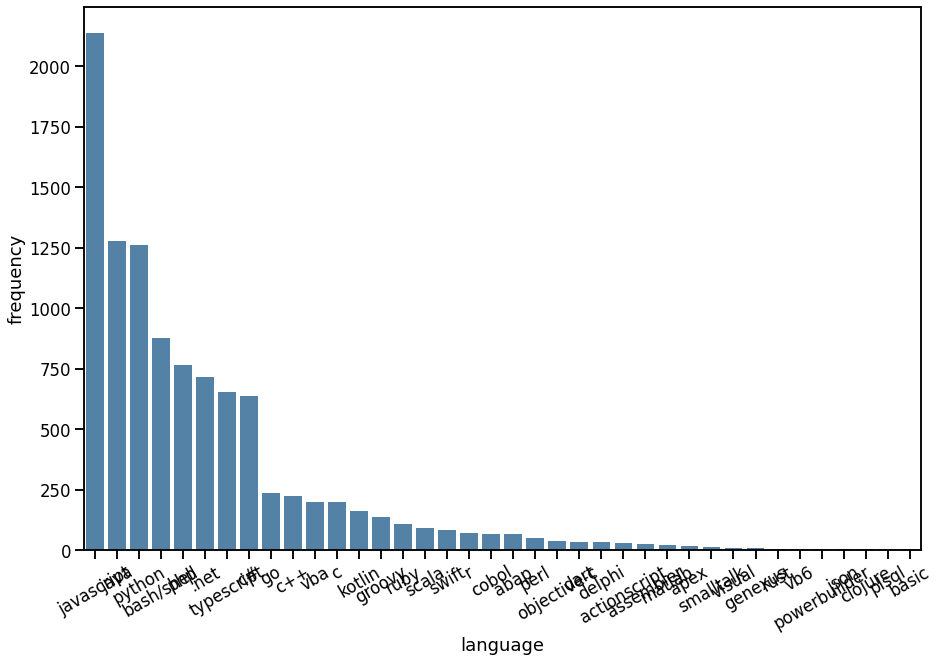

In [19]:
fig=plt.figure(figsize=(15,10))
seaborn.barplot(data=filtered_languages, x='language', y='frequency', color="steelblue")
plt.xticks(rotation=30)

Vamos a quitar del dataframe todos los valores que no pertenecen a los lenguajes de programación elegidos

In [29]:
filtered_values = filtered_values[filtered_values['programming_language'].isin(filtered_languages['language'])]

Vamos a convertir los años de experiencia en una variable categórica ordinal: ['Junior', 'SemiSenior', 'Senior']

In [50]:
#filtered_df_lang.loc[:, 'salary_range'] = pd.cut(df.salary_monthly_NETO, range(0, 500000, 50000), right=False)
min = int(filtered_values['salary_monthly_NETO'].min())
max = int(filtered_values['salary_monthly_NETO'].max())
ranges = range(min, max + 50000, 50000)
filtered_values.loc[:, 'salary_range'] = pd.cut(filtered_values.salary_monthly_NETO, ranges, right=False, labels=["Bajo", "Medio", "Alto", "Muy alto"])
filtered_values[:20]

,programming_language,profile_years_experience,salary_monthly_NETO,tools_programming_languages,cured_programming_languages,salary_range
1,javascript,5.0,63000.0,"HTML, Javascript, Python","[html, javascript, python]",Bajo
1,python,5.0,63000.0,"HTML, Javascript, Python","[html, javascript, python]",Bajo
3,bash/shell,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio
3,c,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio
3,java,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio
3,javascript,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio
3,php,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio
3,python,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio
4,javascript,9.0,106000.0,"CSS, HTML, Javascript, SQL, TypeScript","[css, html, javascript, sql, typescript]",Medio
4,typescript,9.0,106000.0,"CSS, HTML, Javascript, SQL, TypeScript","[css, html, javascript, sql, typescript]",Medio


Creamos una nueva categoría para identificar las categorías de experiencias de las distintas personas: ['Junior', 'SemiSenior', 'Senior']

In [51]:
def set_profile_category(years_of_experience):
    if not isinstance(years_of_experience, float):
        return 'Junior'
    if years_of_experience < 5:
        return 'Junior'
    if years_of_experience < 10:
        return 'Semi Senior'
    return 'Senior'

# Create a new column with the list of languages
filtered_values.loc[:, 'profile_category'] = filtered_values.profile_years_experience\
    .apply(set_profile_category)
filtered_values[:20]

,programming_language,profile_years_experience,salary_monthly_NETO,tools_programming_languages,cured_programming_languages,salary_range,profile_category
1,javascript,5.0,63000.0,"HTML, Javascript, Python","[html, javascript, python]",Bajo,Semi Senior
1,python,5.0,63000.0,"HTML, Javascript, Python","[html, javascript, python]",Bajo,Semi Senior
3,bash/shell,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio,Senior
3,c,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio,Senior
3,java,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio,Senior
3,javascript,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio,Senior
3,php,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio,Senior
3,python,15.0,102000.0,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","[bash/shell, c, css, html, java, javascript, p...",Medio,Senior
4,javascript,9.0,106000.0,"CSS, HTML, Javascript, SQL, TypeScript","[css, html, javascript, sql, typescript]",Medio,Semi Senior
4,typescript,9.0,106000.0,"CSS, HTML, Javascript, SQL, TypeScript","[css, html, javascript, sql, typescript]",Medio,Semi Senior


In [61]:
popular_languages = ['.net', 'java', 'c#', 'javascript', 'python', 'go', 'groovy']
small_dataframe = filtered_values[filtered_values['programming_language'].isin(popular_languages)]
small_dataframe.groupby(['programming_language', 'profile_category', 'salary_range']).count()[:40]

profile_years_experience  \
programming_language profile_category salary_range                             
.net                 Junior           Bajo                               185   
                                      Medio                               68   
                                      Alto                                 3   
                                      Muy alto                             2   
                     Semi Senior      Bajo                                62   
                                      Medio                               74   
                                      Alto                                14   
                                      Muy alto                             3   
                     Senior           Bajo                                61   
                                      Medio                              175   
                                      Alto                                55   
                                      Muy alto                            15   
c#                   Junior           Bajo                               174   
                                      Medio                               62   
                                      Alto                                 2   
                                      Muy alto                             2   
                     Semi Senior      Bajo                                58   
                                      Medio                               76   
                                      Alto                                12   
                                      Muy alto                             3   
                     Senior           Bajo                                55   
                                      Medio                              140   
                                      Alto                                43   
                                      Muy alto                            10   
go                   Junior           Bajo                                25   
                                      Medio                               46   
                                      Alto                                12   
                                      Muy alto                             0   
                     Semi Senior      Bajo                                 7   
                                      Medio                               36   
                                      Alto                                17   
                                      Muy alto                             3   
                     Senior           Bajo                                 7   
                                      Medio                               37   
                                      Alto                                30   
                                      Muy alto                            19   
groovy               Junior           Bajo                                22   
                                      Medio                               19   
                                      Alto                                 3   
                                      Muy alto                             1   

                                                    salary_monthly_NETO  \
programming_language profile_category salary_range                        
.net                 Junior           Bajo                          185   
                                      Medio                          68   
                                      Alto                            3   
                                      Muy alto                        2   
                     Semi Senior      Bajo                           62   
                                      Medio                          74   
                                      Alto                           14   
                